In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lending-club/rejected_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv
/kaggle/input/lending-club/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv


In [49]:
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

### 1.Reading a file  

In [50]:
df = pd.read_csv('/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv')

In [51]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [52]:
df.shape

(2260701, 151)

### 2. Finding the target column and only considering Fully_paid : 0 and Default : 1 Charged_off : 1  

In [53]:
df['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [54]:
df['loan_status'] = df['loan_status'].replace({'Charged Off' : 'Default'})

In [55]:
# Define the valid statuses
valid_statuses = ['Fully Paid','Default']

# Keep only those rows in a new DataFrame
df = df[df['loan_status'].isin(valid_statuses)].copy()

# Map the loan_status to binary target values
df['loan_status'] = df['loan_status'].map({
    'Fully Paid': 0,
    'Default': 1
})

In [56]:
df['loan_status'].unique()

array([0, 1])

In [57]:
df['loan_status'].value_counts(normalize=True) * 100

loan_status
0    80.035009
1    19.964991
Name: proportion, dtype: float64

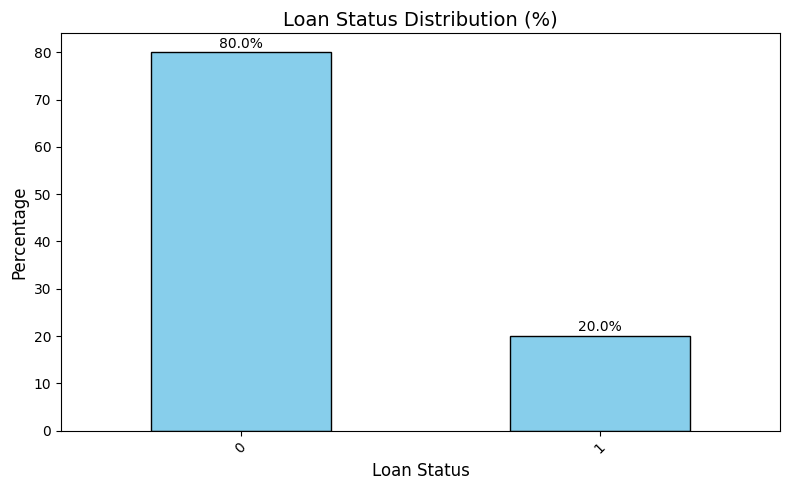

In [58]:
import matplotlib.pyplot as plt

# Calculate percentages
loan_status_perc = df['loan_status'].value_counts(normalize=True) * 100

# Plot bar chart
plt.figure(figsize=(8,5))
loan_status_perc.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Loan Status Distribution (%)', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

# Add percentage labels on bars
for i, v in enumerate(loan_status_perc):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### We can clearly see that the class is imbalanced

In [59]:
# 1️⃣ Calculate missing value percentage for each column
missing_percent = df.isnull().mean() * 100

# 2️⃣ Display missing value percentages
print("Missing Value Percentage for Each Column:\n")
print(missing_percent)

# 3️⃣ Drop columns with more than 50% missing values
threshold = 50
cols_to_drop = missing_percent[missing_percent > threshold].index
df = df.drop(columns=cols_to_drop)

# 4️⃣ Print summary
print(f"\nColumns dropped (more than {threshold}% missing): {list(cols_to_drop)}")
print(f"\nRemaining columns: {df.shape[1]}")


Missing Value Percentage for Each Column:

id                         0.000000
member_id                100.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
                            ...    
settlement_status         97.526146
settlement_date           97.526146
settlement_amount         97.526146
settlement_percentage     97.526146
settlement_term           97.526146
Length: 151, dtype: float64

Columns dropped (more than 50% missing): ['member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_l

In [60]:
df.shape

(1345350, 93)

In [61]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
5,68426831,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,300xx,GA,10.20,0.0,Oct-1987,690.0,694.0,0.0,5.0,

### Drop the columns having missing percentage value more than 50

In [62]:
df.isnull().sum()

id                                0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
                              ...  
total_bc_limit                47281
total_il_high_credit_limit    67527
hardship_flag                     0
disbursement_method               0
debt_settlement_flag              0
Length: 93, dtype: int64

### 3. Dealing with the Categorical Columns

In [63]:
df.select_dtypes(include = 'object').sample(3)

,id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
1009880,75140668,60 months,D,D1,Specialist,4 years,RENT,Verified,Mar-2016,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,851xx,AZ,Feb-1977,w,Jul-2018,Oct-2018,Individual,N,Cash,N
724439,77399174,36 months,C,C1,Retail,10+ years,OWN,Source Verified,Apr-2016,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,920xx,CA,Jan-2009,w,Aug-2017,Feb-2018,Individual,N,Cash,N
1753834,9645932,36 months,B,B2,health physicist,4 years,MORTGAGE,Not Verified,Dec-2013,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,car rteefinance,630xx,MO,Jan-1989,f,Jun-2015,Feb-2018,Individual,N,Cash,N


In [64]:
df['debt_settlement_flag'].unique()

array(['N', 'Y'], dtype=object)

In [65]:
# Remove leading/trailing whitespaces from objects
df = df.apply(lambda col: col.str.strip() if col.dtypes == 'object' else col)

# Convert multiple columns to datetime (month-year format)
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%b-%Y', errors='coerce')

cols_to_drop = ['title', 'zip_code', 'pymnt_plan', 'emp_title', 'url']
df = df.drop(columns=cols_to_drop)

df.debt_settlement_flag = np.where(df.debt_settlement_flag == 'Y',1,0)

df.term_36_months = np.where(df.term == '36 months',1,0)
df.drop('term', axis=1, inplace=True)

df['emp_length'] = df['emp_length'].fillna('')
df['emp_length'] = pd.to_numeric(df['emp_length'].str.replace('<', '', regex=False).str[:2].str.strip(), errors='coerce')

df.hardship_flag.fillna('N', inplace=True)
df.hardship_flag = np.where(df.hardship_flag == 'NaN', 'N', df.hardship_flag)



In [66]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,NaN,3600.0,3600.0,3600.0,13.99,123.03,C,C4,10.0,MORTGAGE,55000.0,Not Verified,2015-12-01,0,debt_consolidation,PA,5.91,0.0,2003-08-01,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,2019-01-01,122.67,2019-03-01,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,0
1,NaN,24700.0,24700.0,24700.0,11.99,820.28,C,C1,10.0,MORTGAGE,65000.0,Not Verified,2015-12-01,0,small_business,SD,16.06,1.0,1999-12-01,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,2016-06-01,926.35,2019-03-01,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,0
2,NaN,20000.0,20000.0,20000.0,10.78,432.66,B,B4,10.0,MORTGAGE,63000.0,Not Verified,2015-12-01,0,home_improvement,IL,10.78,0.0,2000-08-01,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,2017-06-01,15813.30,2019-03-01,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,0
4,NaN,10400.0,10400.0,10400.0,22.45,289.91,F,F1,3.0,MORTGAGE,104433.0,Source Verified,2015-12-01,0,major_purchase,PA,25.37,1.0,1998-06-01,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,2016-07-01,10128.96,2018-03-01,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,0
5,NaN,11950.0,11950.0,11950.0,13.44,405.18,C,C3,4.0,RENT,34000.0,Source Verified,2015-12-01,0,debt_consolidation,GA,10.20,0.0,1987-10-01,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,2017-05-01,7653.56,2017-05-01,759.0,755.0,0.0,1.0,Individual,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,NaN,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,0


In [67]:
categorical_cols = df.select_dtypes(include = ['object']).columns

In [68]:
df = df.drop(columns = 'id',axis = 1)

In [69]:
for col in categorical_cols:
    if(col != 'id'):
        print(f"{col} --> {df[col].unique()}")

grade --> ['C' 'B' 'F' 'A' 'E' 'D' 'G']
sub_grade --> ['C4' 'C1' 'B4' 'F1' 'C3' 'B2' 'B1' 'A2' 'B5' 'C2' 'E2' 'A4' 'E3' 'C5'
 'A1' 'D4' 'F3' 'D1' 'B3' 'D3' 'D5' 'A5' 'F2' 'E4' 'D2' 'E1' 'F5' 'E5'
 'A3' 'G2' 'G1' 'G3' 'G4' 'F4' 'G5']
home_ownership --> ['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE' 'OTHER']
verification_status --> ['Not Verified' 'Source Verified' 'Verified']
purpose --> ['debt_consolidation' 'small_business' 'home_improvement' 'major_purchase'
 'credit_card' 'other' 'house' 'vacation' 'car' 'medical' 'moving'
 'renewable_energy' 'wedding' 'educational']
addr_state --> ['PA' 'SD' 'IL' 'GA' 'MN' 'SC' 'RI' 'NC' 'CA' 'VA' 'AZ' 'IN' 'MD' 'NY'
 'TX' 'KS' 'NM' 'AL' 'WA' 'OH' 'LA' 'FL' 'CO' 'MI' 'MO' 'DC' 'MA' 'WI'
 'HI' 'VT' 'NJ' 'DE' 'TN' 'NH' 'NE' 'OR' 'CT' 'AR' 'NV' 'WV' 'MT' 'WY'
 'OK' 'KY' 'MS' 'UT' 'ND' 'ME' 'AK' 'ID' 'IA']
initial_list_status --> ['w' 'f']
application_type --> ['Individual' 'Joint App']
hardship_flag --> ['N']
disbursement_method --> ['Cash' 'DirectPay']


#### Since hardship has only one value so dropping that column grade and sub grade are some what related so dropping that column as well(subgrade)

In [70]:
df = df.drop(columns = ['hardship_flag','sub_grade'])

In [71]:
for col in df.select_dtypes(include = 'object').columns:
    print(f"{col} --> {df[col].unique()}")

grade --> ['C' 'B' 'F' 'A' 'E' 'D' 'G']
home_ownership --> ['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE' 'OTHER']
verification_status --> ['Not Verified' 'Source Verified' 'Verified']
purpose --> ['debt_consolidation' 'small_business' 'home_improvement' 'major_purchase'
 'credit_card' 'other' 'house' 'vacation' 'car' 'medical' 'moving'
 'renewable_energy' 'wedding' 'educational']
addr_state --> ['PA' 'SD' 'IL' 'GA' 'MN' 'SC' 'RI' 'NC' 'CA' 'VA' 'AZ' 'IN' 'MD' 'NY'
 'TX' 'KS' 'NM' 'AL' 'WA' 'OH' 'LA' 'FL' 'CO' 'MI' 'MO' 'DC' 'MA' 'WI'
 'HI' 'VT' 'NJ' 'DE' 'TN' 'NH' 'NE' 'OR' 'CT' 'AR' 'NV' 'WV' 'MT' 'WY'
 'OK' 'KY' 'MS' 'UT' 'ND' 'ME' 'AK' 'ID' 'IA']
initial_list_status --> ['w' 'f']
application_type --> ['Individual' 'Joint App']
disbursement_method --> ['Cash' 'DirectPay']


### In verification column replacing Source Verified with Verified

In [72]:
df['verification_status'] = df['verification_status'].replace({'Source Verified' : 'Verified'})

In [73]:
df.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
int_rate                          0
installment                       0
                              ...  
total_bal_ex_mort             47281
total_bc_limit                47281
total_il_high_credit_limit    67527
disbursement_method               0
debt_settlement_flag              0
Length: 84, dtype: int64

In [74]:
lat_cat_cols = df.select_dtypes(include = ['object']).columns
df[lat_cat_cols].shape

(1345350, 8)

In [75]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# ----------------------------
# 1️⃣ Ordinal Encoding for 'grade'
# ----------------------------
grade_order = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['grade'] = df['grade'].map(grade_order)

# ----------------------------
# 2️⃣ Label Encoding for Binary Columns
# ----------------------------
label_cols = ['initial_list_status', 'application_type', 'disbursement_method']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

# ----------------------------
# 3️⃣ One-Hot Encoding for Nominal Columns
# ----------------------------
one_hot_cols = ['home_ownership', 'verification_status', 'purpose', 'addr_state']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# ----------------------------
# 4️⃣ Convert Boolean Columns to Integers
# ----------------------------
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

# ----------------------------
# ✅ Final Output
# ----------------------------
print("Encoding complete!")
print("Converted boolean columns:", list(bool_cols))
print("Final shape:", df.shape)


Encoding complete!
Converted boolean columns: ['home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Verified', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'addr_state_AL', 'addr_state_AR', 'addr_state_AZ', 'addr_state_CA', 'addr_state_CO', 'addr_state_CT', 'addr_state_DC', 'addr_state_DE', 'addr_state_FL', 'addr_state_GA', 'addr_state_HI', 'addr_state_IA', 'addr_state_ID', 'addr_state_IL', 'addr_state_IN', 'addr_state_KS', 'addr_state_KY', 'addr_state_LA', 'addr_state_MA', 'addr_state_MD', 'addr_state_ME', 'addr_state_MI', 'addr_state_MN', 'addr_state_MO', 'addr_state_MS', 'addr_state_MT', 'addr_state_NC', 'addr_state_ND', 'addr_state_NE', 'addr_state_NH'

In [76]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,issue_d,loan_status,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,3600.0,3600.0,3600.0,13.99,123.03,3,10.0,55000.0,2015-12-01,0,5.91,0.0,2003-08-01,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,1,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,2019-01-01,122.67,2019-03-01,564.0,560.0,0.0,1.0,0,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,24700.0,24700.0,24700.0,11.99,820.28,3,10.0,65000.0,2015-12-01,0,16.06,1.0,1999-12-01,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,1,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,2016-06-01,926.35,2019-03-01,699.0,695.0,0.0,1.0,0,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,20000.0,20000.0,20000.0,10.78,432.66,2,10.0,63000.0,2015-12-01,0,10.78,0.0,2000-08-01,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,1,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,2017-06-01,15813.30,2019-03-01,704.0,700.0,0.0,1.0,1,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Since all the categorical columns are converted to numeric now checking for the correlation with the target column and the vif value to reduce the multicollinearity between the columns

In [77]:
df.isnull().sum()

loan_amnt          0
funded_amnt        0
funded_amnt_inv    0
int_rate           0
installment        0
                  ..
addr_state_VT      0
addr_state_WA      0
addr_state_WI      0
addr_state_WV      0
addr_state_WY      0
Length: 149, dtype: int64

                    Feature           VIF
22              total_pymnt  2.080185e+13
24          total_rec_prncp  1.524061e+13
25            total_rec_int  1.317227e+12
27               recoveries  1.654306e+11
26       total_rec_late_fee  1.949846e+07
11           fico_range_low  5.095549e+06
12          fico_range_high  5.095430e+06
33              policy_code  8.692347e+04
1               funded_amnt  3.831430e+03
23          total_pymnt_inv  2.810998e+03
2           funded_amnt_inv  2.164102e+03
0                 loan_amnt  1.472619e+03
76  home_ownership_MORTGAGE  1.262554e+03
80      home_ownership_RENT  1.212909e+03
79       home_ownership_OWN  4.863300e+02
70          tot_hi_cred_lim  9.848281e+01
37              tot_cur_bal  9.422182e+01
98            addr_state_CA  5.531960e+01
60      num_rev_tl_bal_gt_0  4.414300e+01
54          num_actv_rev_tl  4.203108e+01


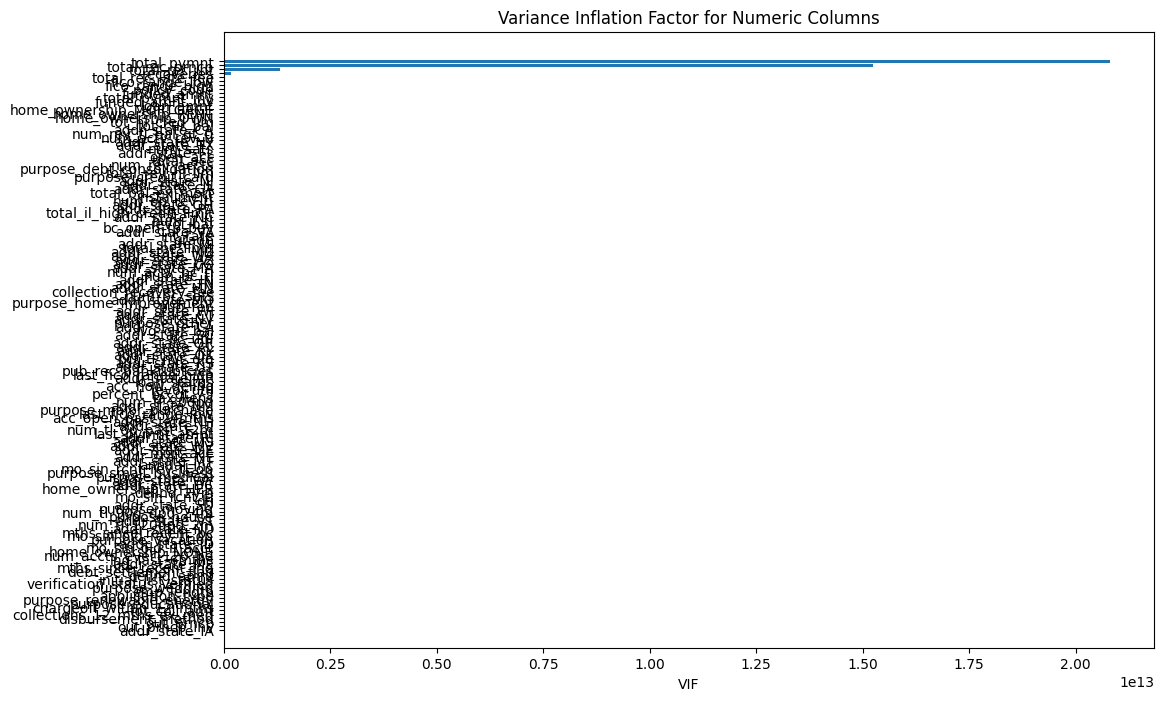

In [78]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# ----------------------------
# 1️⃣ Select numeric columns
# ----------------------------
X = df.select_dtypes(include=[np.number]).copy()

# ----------------------------
# 2️⃣ Handle NaN and Inf values
# ----------------------------
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # replace inf with NaN
X.fillna(0, inplace=True)  # fill NaN with 0 (or use X.mean() if preferred)

# ----------------------------
# 3️⃣ Sample rows for speed
# ----------------------------
sample_size = 10000  # 5k-10k is usually enough
if len(X) > sample_size:
    X_sample = X.sample(n=sample_size, random_state=42)
else:
    X_sample = X.copy()

# ----------------------------
# 4️⃣ Function to calculate VIF
# ----------------------------
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# ----------------------------
# 5️⃣ Calculate VIF
# ----------------------------
vif_data = calculate_vif(X_sample)
vif_data = vif_data.sort_values(by='VIF', ascending=False)

# Display top 20 VIFs for inspection
print(vif_data.head(20))

# ----------------------------
# 6️⃣ Optional: Visualize VIFs
# ----------------------------
plt.figure(figsize=(12,8))
plt.barh(vif_data['Feature'], vif_data['VIF'])
plt.xlabel('VIF')
plt.title('Variance Inflation Factor for Numeric Columns')
plt.gca().invert_yaxis()
plt.show()


In [79]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ----------------------------
# 1️⃣ Select numeric columns
# ----------------------------
X = df.select_dtypes(include=[np.number]).copy()

# ----------------------------
# 2️⃣ Handle NaN and Inf values
# ----------------------------
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)  # you can also use X.fillna(X.mean())

# ----------------------------
# 3️⃣ Sampling for efficiency
# ----------------------------
sample_size = 10000
if len(X) > sample_size:
    X_sample = X.sample(n=sample_size, random_state=42)
else:
    X_sample = X.copy()

# ----------------------------
# 4️⃣ Function to calculate VIF
# ----------------------------
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# ----------------------------
# 5️⃣ Iteratively remove columns with VIF > threshold
# ----------------------------
max_vif_threshold = 10
iteration = 1

while True:
    vif_df = calculate_vif(X_sample)
    max_vif = vif_df['VIF'].max()
    
    print(f"\nIteration {iteration} — Max VIF: {max_vif:.2f}")
    
    # Stop if all VIFs are below threshold
    if max_vif <= max_vif_threshold:
        print("\n✅ All remaining features have VIF <= 10")
        break
    
    # Drop the column with the highest VIF
    drop_col = vif_df.sort_values(by='VIF', ascending=False)['Feature'].iloc[0]
    print(f"🚨 Dropping column '{drop_col}' with VIF = {max_vif:.2f}")
    
    X_sample = X_sample.drop(columns=[drop_col])
    X = X.drop(columns=[drop_col])  # also drop from full dataset
    iteration += 1

# ----------------------------
# 6️⃣ Result
# ----------------------------
print("\n🎯 Final numeric features after VIF reduction:")
print(X.columns.tolist())

# Cleaned dataset with reduced multicollinearity
df_vif_reduced = df[X.columns]



Iteration 1 — Max VIF: 20801845853905.29
🚨 Dropping column 'total_pymnt' with VIF = 20801845853905.29

Iteration 2 — Max VIF: 5095494.75
🚨 Dropping column 'fico_range_low' with VIF = 5095494.75

Iteration 3 — Max VIF: 7038.09
🚨 Dropping column 'policy_code' with VIF = 7038.09

Iteration 4 — Max VIF: 14485.47
🚨 Dropping column 'funded_amnt' with VIF = 14485.47

Iteration 5 — Max VIF: 4395.27
🚨 Dropping column 'total_pymnt_inv' with VIF = 4395.27

Iteration 6 — Max VIF: 1109.62
🚨 Dropping column 'loan_amnt' with VIF = 1109.62

Iteration 7 — Max VIF: 990.10
🚨 Dropping column 'fico_range_high' with VIF = 990.10

Iteration 8 — Max VIF: 353.93
🚨 Dropping column 'home_ownership_MORTGAGE' with VIF = 353.93

Iteration 9 — Max VIF: 261.29
🚨 Dropping column 'last_fico_range_high' with VIF = 261.29

Iteration 10 — Max VIF: 181.84
🚨 Dropping column 'tot_hi_cred_lim' with VIF = 181.84

Iteration 11 — Max VIF: 160.63
🚨 Dropping column 'open_acc' with VIF = 160.63

Iteration 12 — Max VIF: 152.77
🚨 Dr

In [80]:
df_vif_reduced.shape

(1345350, 114)

In [81]:
df_vif_reduced['loan_status']

0          0
1          0
2          0
4          0
5          0
          ..
2260688    0
2260690    0
2260691    1
2260692    0
2260697    1
Name: loan_status, Length: 1345350, dtype: int64

In [82]:
y = df_vif_reduced['loan_status']
# df_vif_reduced = df_vif_reduced.drop(columns = 'loan_status',axis = 1)

In [83]:
# Make a copy to avoid modifying original df
df_temp = df_vif_reduced.copy()

# Add target column 'y' to the DataFrame
df_temp['y'] = y  # y is your target Series

# Compute absolute correlation with target
correlation_with_target = df_temp.corr()['y'].abs()

# Set threshold for low correlation
threshold = 0.05

# Identify columns with correlation below threshold
low_corr_features = correlation_with_target[correlation_with_target < threshold].index.tolist()

# Remove the target column from the list if included
low_corr_features = [col for col in low_corr_features if col != 'y']

print(f"Columns with low correlation with target (corr < {threshold}):\n{low_corr_features}\n")

# Drop low-correlation columns
df_final = df_temp.drop(columns=low_corr_features)


Columns with low correlation with target (corr < 0.05):
['emp_length', 'annual_inc', 'delinq_2yrs', 'pub_rec', 'revol_bal', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'num_accts_ever_120_pd', 'num_bc_tl', 'num_il_tl', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'pub_rec_bankruptcies', 'tax_liens', 'total_il_high_credit_limit', 'disbursement_method', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'purpose_credit_card', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'addr_state_AL', 'addr_state_AR', 'addr_state_AZ', 'addr_state_CA', 'addr_state_CO', 'addr_state_CT', 'addr_state_DC', 'addr_state_DE', 'addr_

In [84]:
df_final.head()

,installment,loan_status,dti,inq_last_6mths,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_rev_tl,num_tl_op_past_12m,percent_bc_gt_75,debt_settlement_flag,home_ownership_RENT,verification_status_Verified,y
0,123.03,0,5.91,1.0,821.72,0.0,0.0,0.0,122.67,4.0,20701.0,1506.0,128.0,3.0,3.0,1.0,4.0,4.0,4.0,3.0,0.0,0,0,0,0
1,820.28,0,16.06,4.0,979.66,0.0,0.0,0.0,926.35,4.0,9733.0,57830.0,192.0,2.0,2.0,4.0,2.0,0.0,5.0,2.0,7.7,0,0,0,0
2,432.66,0,10.78,0.0,2705.92,0.0,0.0,0.0,15813.30,6.0,31617.0,2737.0,184.0,14.0,14.0,5.0,101.0,10.0,3.0,0.0,50.0,0,0,0,0
4,289.91,0,25.37,3.0,1340.50,0.0,0.0,0.0,10128.96,10.0,27644.0,4567.0,210.0,4.0,4.0,6.0,4.0,1.0,6.0,4.0,60.0,0,0,1,0
5,405.18,0,10.20,0.0,1758.95,0.0,0.0,0.0,7653.56,0.0,2560.0,844.0,54.0,32.0,32.0,0.0,36.0,NaN,3.0,0.0,100.0,0,1,1,0


In [85]:
df_final['loan_status']

0          0
1          0
2          0
4          0
5          0
          ..
2260688    0
2260690    0
2260691    1
2260692    0
2260697    1
Name: loan_status, Length: 1345350, dtype: int64

In [86]:
df_final.shape

(1345350, 25)

In [87]:
df_final.to_csv('Preprocess_df_1.csv',index = False)

In [88]:
df_final.head()

,installment,loan_status,dti,inq_last_6mths,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_rev_tl,num_tl_op_past_12m,percent_bc_gt_75,debt_settlement_flag,home_ownership_RENT,verification_status_Verified,y
0,123.03,0,5.91,1.0,821.72,0.0,0.0,0.0,122.67,4.0,20701.0,1506.0,128.0,3.0,3.0,1.0,4.0,4.0,4.0,3.0,0.0,0,0,0,0
1,820.28,0,16.06,4.0,979.66,0.0,0.0,0.0,926.35,4.0,9733.0,57830.0,192.0,2.0,2.0,4.0,2.0,0.0,5.0,2.0,7.7,0,0,0,0
2,432.66,0,10.78,0.0,2705.92,0.0,0.0,0.0,15813.30,6.0,31617.0,2737.0,184.0,14.0,14.0,5.0,101.0,10.0,3.0,0.0,50.0,0,0,0,0
4,289.91,0,25.37,3.0,1340.50,0.0,0.0,0.0,10128.96,10.0,27644.0,4567.0,210.0,4.0,4.0,6.0,4.0,1.0,6.0,4.0,60.0,0,0,1,0
5,405.18,0,10.20,0.0,1758.95,0.0,0.0,0.0,7653.56,0.0,2560.0,844.0,54.0,32.0,32.0,0.0,36.0,NaN,3.0,0.0,100.0,0,1,1,0


### Splitting the data into train_test_split later doing the scaling

In [89]:
from sklearn.model_selection import train_test_split

In [91]:
y_fin = df_final['loan_status']
df_final = df_final.drop(columns = 'loan_status',axis = 1)

In [92]:
X_train,X_test,y_train,y_test = train_test_split(df_final,y_fin,test_size = 0.25,random_state = 42)

In [93]:
X_train.shape,X_test.shape

((1009012, 24), (336338, 24))

In [94]:
X_train.head()

,installment,dti,inq_last_6mths,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_rev_tl,num_tl_op_past_12m,percent_bc_gt_75,debt_settlement_flag,home_ownership_RENT,verification_status_Verified,y
1034676,498.15,23.19,1.0,2923.11,0.0,0.0,0.0,497.85,5.0,19367.0,11645.0,452.0,4.0,1.0,3.0,4.0,1.0,4.0,3.0,50.0,0,0,0,0
295344,667.06,26.98,1.0,3307.04,0.0,0.0,0.0,667.06,1.0,5749.0,3390.0,169.0,3.0,3.0,0.0,74.0,0.0,4.0,1.0,66.7,0,1,1,1
1477711,167.83,20.64,0.0,258.73,0.0,0.0,0.0,4590.95,2.0,43796.0,2259.0,133.0,25.0,4.0,1.0,25.0,4.0,7.0,1.0,85.7,0,0,1,0
1989403,655.92,17.03,2.0,8536.71,0.0,0.0,0.0,18763.49,5.0,42357.0,617.0,135.0,5.0,5.0,2.0,23.0,0.0,6.0,3.0,100.0,0,0,1,0
1039353,359.79,15.15,0.0,1447.19,0.0,0.0,0.0,359.58,3.0,8010.0,107204.0,503.0,13.0,12.0,2.0,13.0,21.0,4.0,1.0,0.0,0,0,1,0


In [95]:
cols_to_scale = ['installment','dti','inq_last_6mths','total_rec_int','last_pymnt_amnt','acc_open_past_24mths'
                ,'avg_cur_bal','bc_open_to_buy','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl',
                'mort_acc','mths_since_recent_bc','mths_since_recent_inq','num_actv_rev_tl','num_tl_op_past_12m',
                'percent_bc_gt_75']

In [96]:
len(cols_to_scale)

17

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler = MinMaxScaler()

In [100]:
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [101]:
X_train.head()

,installment,dti,inq_last_6mths,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_rev_tl,num_tl_op_past_12m,percent_bc_gt_75,debt_settlement_flag,home_ownership_RENT,verification_status_Verified,y
1034676,0.287609,0.02419,0.125,0.103684,0.0,0.0,0.0,0.011800,0.089286,0.020214,0.020798,0.529412,0.010101,0.003185,0.058824,0.006260,0.04,0.063492,0.09375,0.500,0,0,0,0
295344,0.386104,0.02798,0.125,0.117302,0.0,0.0,0.0,0.015810,0.017857,0.006001,0.006055,0.196471,0.007576,0.009554,0.000000,0.115806,0.00,0.063492,0.03125,0.667,0,1,1,1
1477711,0.094991,0.02164,0.000,0.009177,0.0,0.0,0.0,0.108811,0.035714,0.045712,0.004035,0.154118,0.063131,0.012739,0.019608,0.039124,0.16,0.111111,0.03125,0.857,0,0,1,0
1989403,0.379608,0.01803,0.250,0.302801,0.0,0.0,0.0,0.444716,0.089286,0.044210,0.001102,0.156471,0.012626,0.015924,0.039216,0.035994,0.00,0.095238,0.09375,1.000,0,0,1,0
1039353,0.206928,0.01615,0.000,0.051332,0.0,0.0,0.0,0.008522,0.053571,0.008360,0.191466,0.589412,0.032828,0.038217,0.039216,0.020344,0.84,0.063492,0.03125,0.000,0,0,1,0


In [102]:
X_train.to_csv('Scaler_train_df.csv',index = False)
X_test.to_csv('Scaler_test_df.csv',index = False)
y_train.to_csv('y_train.csv',index = False)
y_test.to_csv('y_test.csv',index = False)

In [103]:
X_train.head()

,installment,dti,inq_last_6mths,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_rev_tl,num_tl_op_past_12m,percent_bc_gt_75,debt_settlement_flag,home_ownership_RENT,verification_status_Verified,y
1034676,0.287609,0.02419,0.125,0.103684,0.0,0.0,0.0,0.011800,0.089286,0.020214,0.020798,0.529412,0.010101,0.003185,0.058824,0.006260,0.04,0.063492,0.09375,0.500,0,0,0,0
295344,0.386104,0.02798,0.125,0.117302,0.0,0.0,0.0,0.015810,0.017857,0.006001,0.006055,0.196471,0.007576,0.009554,0.000000,0.115806,0.00,0.063492,0.03125,0.667,0,1,1,1
1477711,0.094991,0.02164,0.000,0.009177,0.0,0.0,0.0,0.108811,0.035714,0.045712,0.004035,0.154118,0.063131,0.012739,0.019608,0.039124,0.16,0.111111,0.03125,0.857,0,0,1,0
1989403,0.379608,0.01803,0.250,0.302801,0.0,0.0,0.0,0.444716,0.089286,0.044210,0.001102,0.156471,0.012626,0.015924,0.039216,0.035994,0.00,0.095238,0.09375,1.000,0,0,1,0
1039353,0.206928,0.01615,0.000,0.051332,0.0,0.0,0.0,0.008522,0.053571,0.008360,0.191466,0.589412,0.032828,0.038217,0.039216,0.020344,0.84,0.063492,0.03125,0.000,0,0,1,0


In [104]:
X_train.shape

(1009012, 24)